# **Linear, polynomial, splines and Fourier regression on nonlinear data.**
Luis Santiago Luna Mireles.
Aprendizaje automático.

## Abstract

This notebook demonstrates how to measure the error from different approaches to understanding non-linear data. Various methods exist for calculating, predicting, and, most importantly, finding the model closest to the ground truth. This "ground truth" refers to data that has been processed and compared to verify its accuracy, or at least represents the best available representation.

## Content

Since our datasets exhibit non-linearity, employing linear regression alone would be ineffective. Fortunately, we have powerful alternatives at our disposal. One such approach is polynomial regression, which introduces the capability to capture polynomial relationships within the data. Additionally, splines offer a flexible method by essentially creating piecewise linear segments that seamlessly adapt to the data's complexities. Finally, Fourier regression shines in analyzing periodic patterns, making it valuable for time-series data or situations where cyclical trends exist.

### Activity 1
In this section is the code for Activity 1

In [154]:

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.interpolate import CubicSpline
from sklearn.utils import resample


In [155]:
drive.mount('/content/gdrive')
!ls "/content/gdrive/My Drive/ArtificialData"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'Captura de pantalla 2024-02-11 154108.png'	   DS-5-1-GAP-0-1-N-0_v2.dat
'Captura de pantalla 2024-02-11 154305.png'	   DS-5-1-GAP-1-1-N-1_v2.csv
'Copia de DS-5-1-G-0-N-0_error_bars_0-106.eps'	   DS-5-1-GAP-1-1-N-1_v2.dat
'Copia de DS-5-1-G-5-1-N-0_error_bars_0-466.eps'   DS-5-1-GAP-5-1-N-3_v2.csv
'Copia de underlying_DS-5-1.jpg'		   DS-5-1-GAP-5-1-N-3_v2.dat
 DS-5-1-GAP-0-1-N-0_v2.csv


Text(0.5, 1.0, 'dataset: DS-5-1-GAP-0-1-N-0_v2.csv')

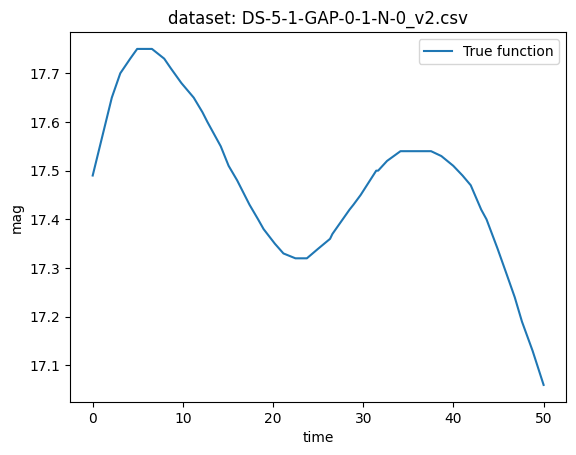

In [156]:
#Reading data

testing_data = pd.read_csv("/content/gdrive/My Drive/ArtificialData/DS-5-1-GAP-0-1-N-0_v2.csv",header=None)
#Plot real data

plt.plot(testing_data[0], testing_data[1], label="True function")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("dataset: "+ "DS-5-1-GAP-0-1-N-0_v2.csv")

#### First dataset 'DS-5-1-GAP-1-1-N-1__v2.csv'

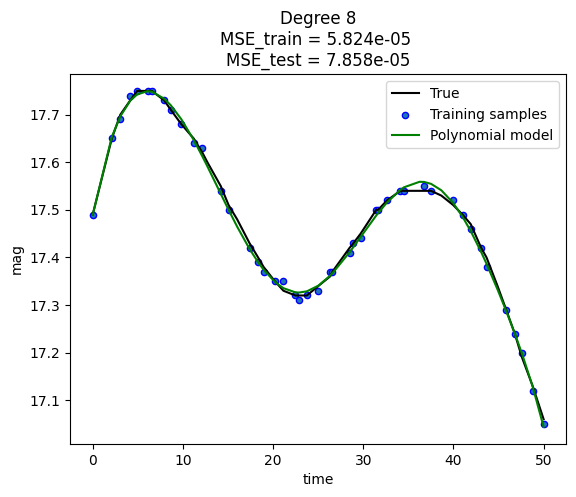

Ecuación del modelo: -0.0000 + 1.3593157411305457e-09 * x**8 + -9.931239321222369e-08 * x**7 + 3.5887440996385926e-06 * x**6 + -7.184973595503625e-05 * x**5 + 0.0010456818957526065 * x**4 + -0.014411143068331158 * x**3 + 0.1037594426524732 * x**2 + 0.0 * x**1


In [157]:
#Reading data
d_true = pd.read_csv("/content/gdrive/My Drive/ArtificialData/DS-5-1-GAP-0-1-N-0_v2.csv",header=None)
d_noise1 = pd.read_csv("/content/gdrive/My Drive/ArtificialData/DS-5-1-GAP-1-1-N-1_v2.csv",header=None)#, usecols=[0]
d_noise1.name= 'DS-5-1-GAP-1-1-N-1_v2.csv'
d_true.name='DS-5-1-GAP-0-1-N-0_v2.csv'
#Creating degrees form 1 to 100
degrees = list(range(1, 101))
MSE_list = []
measure_MSE_test = 100000
degree = 0

#Creating models and iterating through the degrees of the equation to select the one with the lowest MSE.
for i in range(len(degrees)):
    model = make_pipeline(PolynomialFeatures(degree = degrees[i]), LinearRegression())

    #DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
    X = d_noise1[0].to_numpy()  #time, solo 1
    #X = d_noise1.to_numpy()
    x = X[:, np.newaxis]
    Y = d_noise1[1].to_numpy()  #mag_A, solo 1 columna
    #Y = d_true[1].to_numpy()
    y = Y[:, np.newaxis]

    X_test = d_true[0].to_numpy()
    Y_test = d_true[1].to_numpy()

    #Training
    model.fit(x, y)  #get polynomial model for training data

    x_test = X_test[:, np.newaxis]
    y_test = Y_test[:, np.newaxis]

    #Testing
    y_pred_train = model.predict(x)
    y_pred_test = model.predict(x_test)


    MSE_train = mean_squared_error(y,y_pred_train)
    MSE_test = mean_squared_error(y_test,y_pred_test)
    MSE_list.append(MSE_test)

    #If the current MSE is lower than the global MSE, then they are swapped.
    if(MSE_test < measure_MSE_test):
        y_pred_test_profit = y_pred_test
        measure_MSE_test = MSE_test
        measure_MSE_train = MSE_train
        degree = degrees[i]
        best_model = model

#Plot the true, training samples and the polynomial model
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test_profit, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.4} \nMSE_test = {:.4}".format(
        degree, measure_MSE_train, measure_MSE_test))
plt.show()

coeff = best_model.named_steps['linearregression'].coef_[0]

# Building equation model
equation_model = f"{coeff[-1]:.4f}"
for i in range(len(coeff) - 1, 0, -1):
    equation_model += f" + {coeff[i-1]:} * x**{i}"

print("Ecuación del modelo:", equation_model)

### Table with the MSE
[Table, Image in Drive](https://drive.google.com/file/d/1FFjq4I2TG-Ux805SNB6xHYHGff83BR0B/view?usp=drive_link)


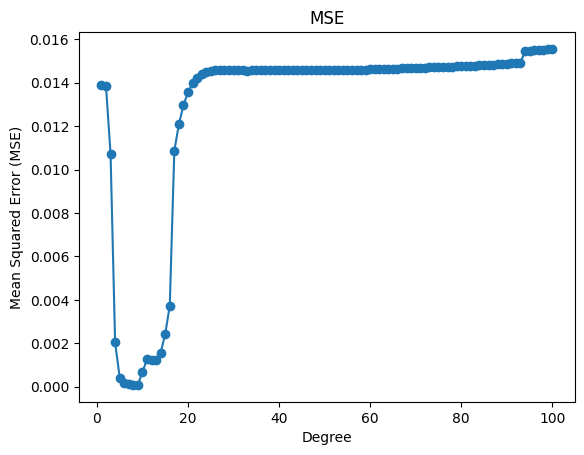

In [158]:
#Plot of all the MSE
plt.plot(degrees, MSE_list, marker='o', linestyle='-')
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE")
plt.show()

Notice that the MSE start to increase from the 20 to 100, so is not necessary research the polynomial more than 20.

#### Second dataset 'DS-5-1-GAP-5-1-N-3__v2.csv'

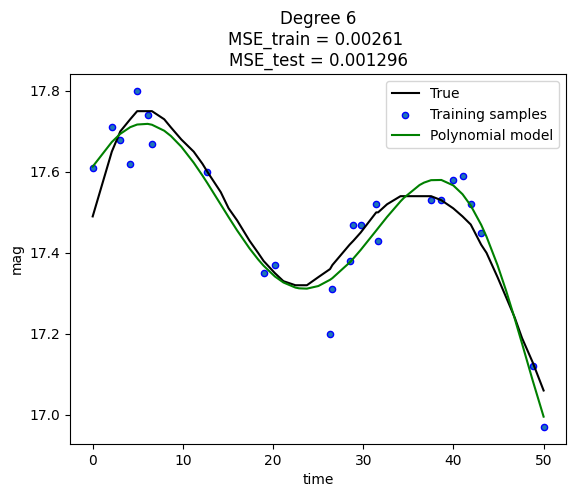

Ecuación del modelo: 0.0000 + -6.046272496898746e-07 * x**6 + 2.801226696088653e-05 * x**5 + -0.00043553023012295807 * x**4 + -0.0005985002825101968 * x**3 + 0.03159485719820056 * x**2 + 0.0 * x**1


In [159]:
#Reading data
d_true = pd.read_csv("/content/gdrive/My Drive/ArtificialData/DS-5-1-GAP-0-1-N-0_v2.csv",header=None)
d_noise2 = pd.read_csv("/content/gdrive/My Drive/ArtificialData/DS-5-1-GAP-5-1-N-3_v2.csv",header=None)
d_noise2.name = 'DS-5-1-GAP-5-1-N-3_v2.csv'

#Creating degrees form 1 to 100
degrees = list(range(1, 101))
MSE_list = []
measure_MSE_test = 100000
degree = 0

#Creating models and iterating through the degrees of the equation to select the one with the lowest MSE.
for i in range(len(degrees)):
    model = make_pipeline(PolynomialFeatures(degree = degrees[i]), LinearRegression())

    #DATA_PATH_NOISE1 = 'DS-5-1-GAP-1-1-N-1_v2.csv'
    X = d_noise2[0].to_numpy()  #time
    x = X[:, np.newaxis]
    Y = d_noise2[1].to_numpy()  #mag_A
    y = Y[:, np.newaxis]

    X_test = d_true[0].to_numpy()
    Y_test = d_true[1].to_numpy()

    #Training
    model.fit(x, y)  #get polynomial model for training data

    x_test = X_test[:, np.newaxis]
    y_test = Y_test[:, np.newaxis]

    #Testing
    y_pred_train = model.predict(x)
    y_pred_test = model.predict(x_test)


    MSE_train = mean_squared_error(y,y_pred_train)
    MSE_test = mean_squared_error(y_test,y_pred_test)
    MSE_list.append(MSE_test)

    #If the current MSE is lower than the global MSE, then they are swapped.
    if(MSE_test < measure_MSE_test):
        y_pred_test_profit = y_pred_test
        measure_MSE_test = MSE_test
        measure_MSE_train = MSE_train
        degree = degrees[i]
        best_model = model

#Plot the true, training samples and the polynomial model
plt.plot(x_test,y_test, color='k', label="True")
plt.scatter(X, y, edgecolor='b', s=20, label="Training samples")
plt.plot(x_test, y_pred_test_profit, color='g', label="Polynomial model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Degree {}\nMSE_train = {:.4} \nMSE_test = {:.4}".format(
        degree, measure_MSE_train, measure_MSE_test))
plt.show()

coeff = best_model.named_steps['linearregression'].coef_[0]

# Building equation model
equation_model = f"{coeff[-1]:.4f}"
for i in range(len(coeff) - 1, 0, -1):
    equation_model += f" + {coeff[i-1]:} * x**{i}"

print("Ecuación del modelo:", equation_model)

### Table with MSE
[Table, Image in Drive](https://drive.google.com/file/d/19nLYv9UN1jjzScOMv47F9Rfo3g9Zclk3/view?usp=drive_link)

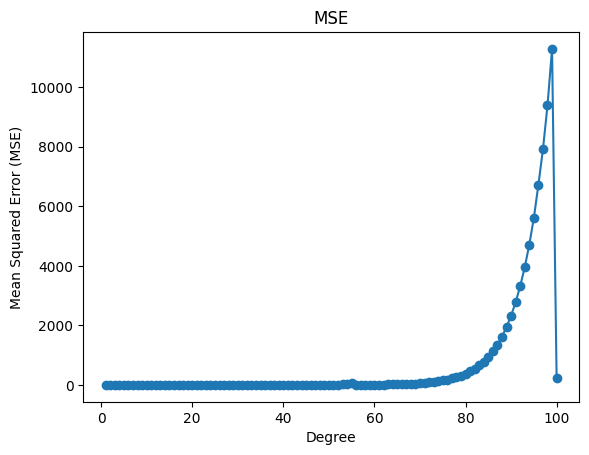

In [160]:
#Plot of all the MSE
plt.plot(degrees, MSE_list, marker='o', linestyle='-')
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE")
plt.show()

### Activity 2
In this section is the code for ativity 2.

In [161]:
import pandas as pd
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [162]:
def to_column(series):
    return series.values.reshape(-1, 1)

### Linear Models

#### First dataset 'DS-5-1-GAP-1-1-N-1'

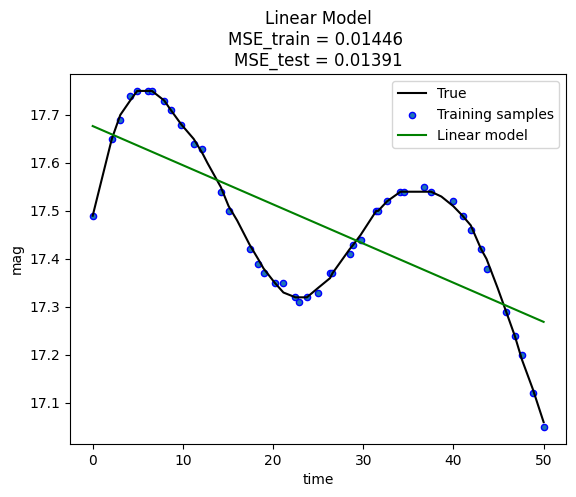

Equation of the model: -0.0082 * x + 17.6768


In [163]:
# Reading data
d_true = pd.read_csv("/content/gdrive/My Drive/ArtificialData/DS-5-1-GAP-0-1-N-0_v2.csv", header=None)
d_noise1 = pd.read_csv("/content/gdrive/My Drive/ArtificialData/DS-5-1-GAP-1-1-N-1_v2.csv", header=None)
d_noise1.name = 'DS-5-1-GAP-1-1-N-1_v2.csv'
d_true.name = 'DS-5-1-GAP-0-1-N-0_v2.csv'
MSE_list = []
measure_MSE_test = 100000
degree = 1

# Creating models and iterating through the degrees of the equation to select the one with the lowest MSE.
model = LinearRegression()

X = d_noise1[0].to_numpy().reshape(-1, 1)
Y = d_noise1[1].to_numpy().reshape(-1, 1)

X_test = d_true[0].to_numpy().reshape(-1, 1)
Y_test = d_true[1].to_numpy().reshape(-1, 1)

# Training
model.fit(X, Y)  # get linear model for training data

# Testing
y_pred_train = model.predict(X)
y_pred_test = model.predict(X_test)

MSE_train = mean_squared_error(Y, y_pred_train)
MSE_test = mean_squared_error(Y_test, y_pred_test)
MSE_list.append(MSE_test)

# If the current MSE is lower than the global MSE, then they are swapped.
if MSE_test < measure_MSE_test:
    y_pred_test_profit = y_pred_test
    measure_MSE_test = MSE_test
    measure_MSE_train = MSE_train
    best_model = model

# Plot the true, training samples and the linear model
plt.plot(X_test, Y_test, color='k', label="True")
plt.scatter(X, Y, edgecolor='b', s=20, label="Training samples")
plt.plot(X_test, y_pred_test_profit, color='g', label="Linear model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Linear Model\nMSE_train = {:.4} \nMSE_test = {:.4}".format(
    measure_MSE_train, measure_MSE_test))
plt.show()

coeff = best_model.coef_[0]

# Building equation model
equation_model = f"{coeff[0]:.4f} * x + {best_model.intercept_[0]:.4f}"

print("Equation of the model:", equation_model)

In [164]:

# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(d_noise1[0], d_noise1[1], test_size=0.2, random_state=42)

# Creating models and iterating through the degrees of the equation to select the one with the lowest MSE.
model = LinearRegression()

X_train = X_train.to_numpy().reshape(-1, 1)
Y_train = Y_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
Y_test = Y_test.to_numpy().reshape(-1, 1)

# Training
model.fit(X_train, Y_train)  # get linear model for training data

# Testing
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating MSE
MSE_train = mean_squared_error(Y_train, y_pred_train)
MSE_test = mean_squared_error(Y_test, y_pred_test)

# Calculating Bias and Variance using Bootstrap resampling
n_iterations = 1000
n_size = int(len(X_test))

# Initialize arrays to store predictions
predictions = np.zeros((n_iterations, n_size))

for i in range(n_iterations):
    # Bootstrap resample
    X_resampled, Y_resampled = resample(X_test, Y_test, replace=True, random_state=i)

    # Make predictions on resampled data
    y_pred_resampled = model.predict(X_resampled)
    predictions[i, :] = y_pred_resampled.flatten()

# Calculate Bias and Variance
bias = np.mean((predictions - np.mean(predictions, axis=0, keepdims=True))**2)
variance = np.mean(np.var(predictions, axis=0, keepdims=True))

print("MSE_train:", MSE_train)
print("MSE_test:", MSE_test)
print("Bias:", bias)
print("Variance:", variance)


MSE_train: 0.015565345893345402
MSE_test: 0.010658364860645964
Bias: 0.013887421836590754
Variance: 0.013887421836590764


#### Second dataset 'DS-5-1-GAP-5-1-N-3'

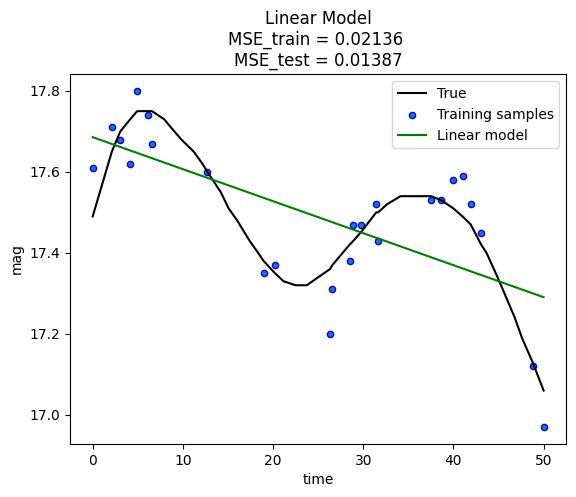

Equation of the model: -0.0079 * x + 17.6858


In [165]:
# Reading data
d_true = pd.read_csv("/content/gdrive/My Drive/ArtificialData/DS-5-1-GAP-0-1-N-0_v2.csv", header=None)
d_noise2 = pd.read_csv("/content/gdrive/My Drive/ArtificialData/DS-5-1-GAP-5-1-N-3_v2.csv", header=None)
d_noise2.name = 'DS-5-1-GAP-1-1-N-1_v2.csv'
d_true.name = 'DS-5-1-GAP-5-1-N-3_v2.csv'
MSE_list = []
measure_MSE_test = 100000
degree = 1

# Creating models and iterating through the degrees of the equation to select the one with the lowest MSE.
model = LinearRegression()

X = d_noise2[0].to_numpy().reshape(-1, 1)
Y = d_noise2[1].to_numpy().reshape(-1, 1)

X_test = d_true[0].to_numpy().reshape(-1, 1)
Y_test = d_true[1].to_numpy().reshape(-1, 1)

# Training
model.fit(X, Y)  # get linear model for training data

# Testing
y_pred_train = model.predict(X)
y_pred_test = model.predict(X_test)

MSE_train = mean_squared_error(Y, y_pred_train)
MSE_test = mean_squared_error(Y_test, y_pred_test)
MSE_list.append(MSE_test)

# If the current MSE is lower than the global MSE, then they are swapped.
if MSE_test < measure_MSE_test:
    y_pred_test_profit = y_pred_test
    measure_MSE_test = MSE_test
    measure_MSE_train = MSE_train
    best_model = model

# Plot the true, training samples and the linear model
plt.plot(X_test, Y_test, color='k', label="True")
plt.scatter(X, Y, edgecolor='b', s=20, label="Training samples")
plt.plot(X_test, y_pred_test_profit, color='g', label="Linear model")
plt.xlabel("time")
plt.ylabel("mag")
plt.legend(loc="best")
plt.title("Linear Model\nMSE_train = {:.4} \nMSE_test = {:.4}".format(
    measure_MSE_train, measure_MSE_test))
plt.show()

coeff = best_model.coef_[0]

# Building equation model
equation_model = f"{coeff[0]:.4f} * x + {best_model.intercept_[0]:.4f}"

print("Equation of the model:", equation_model)

In [166]:
# Splitting data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(d_noise1[0], d_noise1[1], test_size=0.2, random_state=42)

# Creating models and iterating through the degrees of the equation to select the one with the lowest MSE.
model = LinearRegression()

X_train = X_train.to_numpy().reshape(-1, 1)
Y_train = Y_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
Y_test = Y_test.to_numpy().reshape(-1, 1)

# Training
model.fit(X_train, Y_train)  # get linear model for training data

# Testing
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating MSE
MSE_train = mean_squared_error(Y_train, y_pred_train)
MSE_test = mean_squared_error(Y_test, y_pred_test)

# Calculating Bias and Variance using Bootstrap resampling
n_iterations = 1000
n_size = int(len(X_test))

# Initialize arrays to store predictions
predictions = np.zeros((n_iterations, n_size))

for i in range(n_iterations):
    # Bootstrap resample
    X_resampled, Y_resampled = resample(X_test, Y_test, replace=True, random_state=i)

    # Make predictions on resampled data
    y_pred_resampled = model.predict(X_resampled)
    predictions[i, :] = y_pred_resampled.flatten()

# Calculate Bias and Variance
bias = np.mean((predictions - np.mean(predictions, axis=0, keepdims=True))**2)
variance = np.mean(np.var(predictions, axis=0, keepdims=True))

print("MSE_train:", MSE_train)
print("MSE_test:", MSE_test)
print("Bias:", bias)
print("Variance:", variance)


MSE_train: 0.015565345893345402
MSE_test: 0.010658364860645964
Bias: 0.013887421836590754
Variance: 0.013887421836590764


### Polynomial


#### First dataset 'DS-5-1-GAP-1-1-N-1__v2.csv'

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poo

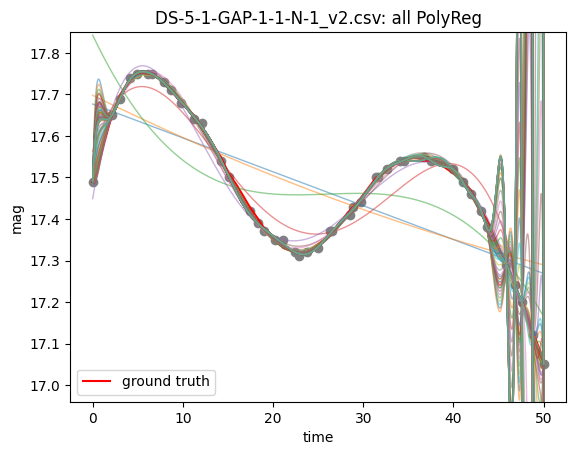

In [167]:
x_test = to_column(d_true[0])
y_test = to_column(d_true[1])

x_train = to_column(d_noise1[0])
y_train = to_column(d_noise1[1])

plt.title(f'{d_noise1.name}: all PolyReg')
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'grey')
plt.plot(x_test, y_test, 'r', label = 'ground truth')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

n0 = 1
nf = 100 #Number of realizations

MSE_template = {'n':[], 'MSE':[]}

MSE_train = pd.DataFrame(MSE_template)
MSE_test = pd.DataFrame(MSE_template)

for n in range(n0, nf + 1):

    # training
    coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=n)
    model = np.poly1d(coef)

    # testing
    y_pred_train = np.polyval(coef, x_train.squeeze())
    y_pred_test = np.polyval(coef, x_test.squeeze())

    # evaluation
    MSE_train.loc[n - 1] = [n, mean_squared_error(y_train, y_pred_train)]
    MSE_test.loc[n - 1] = [n, mean_squared_error(y_test, y_pred_test)]

    # plot dense graph
    x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
    y_pred_test_high_res = np.polyval(coef, x_test_high_res)
    plt.plot(x_test_high_res, y_pred_test_high_res, linewidth = 1, alpha = 0.5)

plt.legend(loc="best")
plt.show()

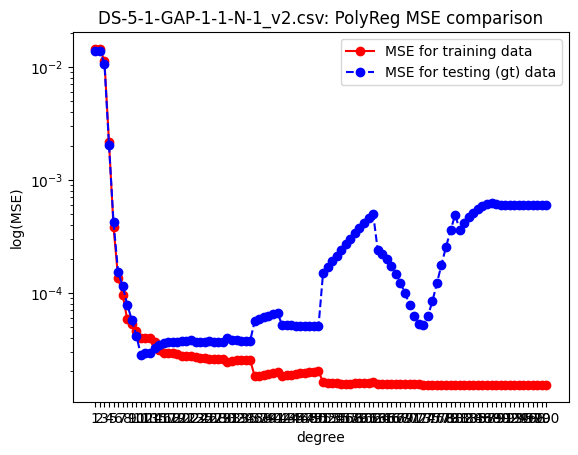

In [168]:
plt.title(f'{d_noise1.name}: PolyReg MSE comparison')
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.plot(MSE_train['n'], MSE_train['MSE'], '-ro', label = 'MSE for training data')
plt.plot(MSE_test['n'], MSE_test['MSE'], '--bo', label = 'MSE for testing (gt) data')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

#### MSE training & testing from 'DS-5-1-GAP-1-1-N-1_v2'

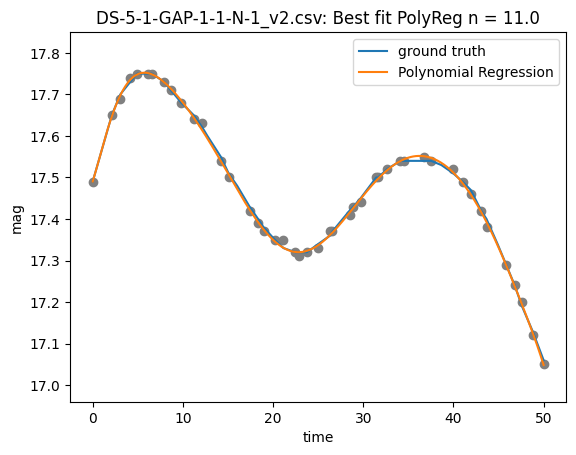

training MSE: 3.941342869860933e-05
testing MSE: 2.81497833836377e-05


In [169]:
best = MSE_test['n'][MSE_test['MSE'].idxmin()]
coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=best)

x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
y_pred_test_high_res = np.polyval(coef, x_test_high_res)

best_MSE_test = MSE_test.loc[MSE_test['n'] == best, 'MSE'].values[0]
best_MSE_train = MSE_train.loc[MSE_train['n'] == best, 'MSE'].values[0]

plt.title(f'{d_noise1.name}: Best fit PolyReg n = {best}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_test, y_test, label = 'ground truth')
plt.plot(x_test_high_res, y_pred_test_high_res, label='Polynomial Regression')
plt.legend(loc="best")
plt.show()

print(f'training MSE: {best_MSE_train}')
print(f'testing MSE: {best_MSE_test}')

#### Second dataset 'DS-5-1-GAP-5-1-N-3__v2.csv'

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poo

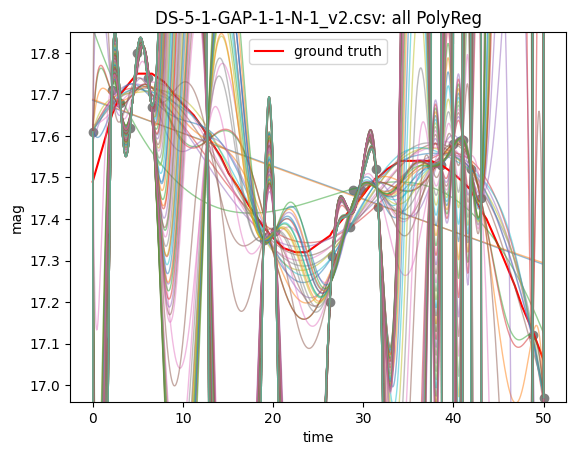

In [170]:
x_test = to_column(d_true[0])
y_test = to_column(d_true[1])

x_train = to_column(d_noise2[0])
y_train = to_column(d_noise2[1])

plt.title(f'{d_noise2.name}: all PolyReg')
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'grey')
plt.plot(x_test, y_test, 'r', label = 'ground truth')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

n0 = 1
nf = 100 #Number of realizations

MSE_template = {'n':[], 'MSE':[]}

MSE_train = pd.DataFrame(MSE_template)
MSE_test = pd.DataFrame(MSE_template)

for n in range(n0, nf + 1):

    # training
    coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=n)
    model = np.poly1d(coef)

    # testing
    y_pred_train = np.polyval(coef, x_train.squeeze())
    y_pred_test = np.polyval(coef, x_test.squeeze())

    # evaluation
    MSE_train.loc[n - 1] = [n, mean_squared_error(y_train.squeeze(), y_pred_train)]
    MSE_test.loc[n - 1] = [n, mean_squared_error(y_test.squeeze(), y_pred_test)]

    # plot dense graph
    x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
    y_pred_test_high_res = np.polyval(coef, x_test_high_res)
    plt.plot(x_test_high_res, y_pred_test_high_res, linewidth = 1, alpha = 0.5)

plt.legend(loc="best")
plt.show()

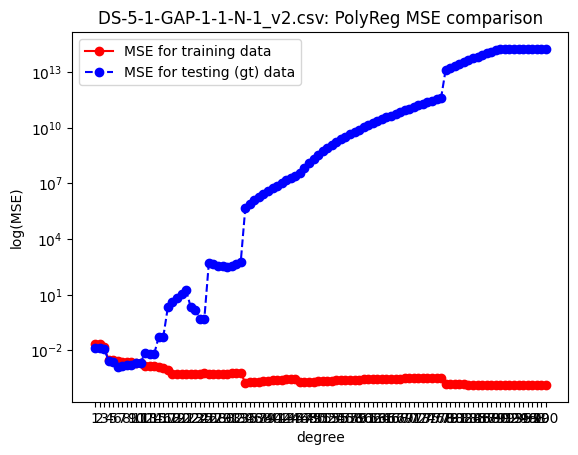

In [171]:
plt.title(f'{d_noise2.name}: PolyReg MSE comparison')
plt.xlabel('degree')
plt.ylabel('log(MSE)')
plt.plot(MSE_train['n'], MSE_train['MSE'], '-ro', label = 'MSE for training data')
plt.plot(MSE_test['n'], MSE_test['MSE'], '--bo', label = 'MSE for testing (gt) data')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

#### MSE training & testing from 'DS-5-1-GAP-5-1-N-3_v2'

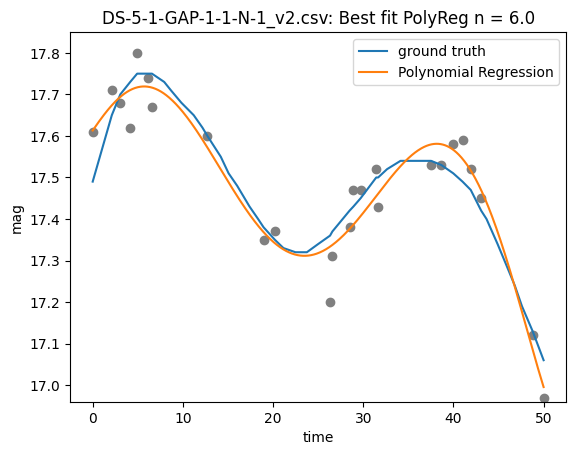

training MSE: 0.002609884681315235
testing MSE: 0.0012955027351582247


In [172]:
best = MSE_test['n'][MSE_test['MSE'].idxmin()]
coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=best)

x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
y_pred_test_high_res = np.polyval(coef, x_test_high_res)

best_MSE_test = MSE_test.loc[MSE_test['n'] == best, 'MSE'].values[0]
best_MSE_train = MSE_train.loc[MSE_train['n'] == best, 'MSE'].values[0]

plt.title(f'{d_noise2.name}: Best fit PolyReg n = {best}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)
plt.xlabel('time')
plt.ylabel('mag')
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_test, y_test, label = 'ground truth')
plt.plot(x_test_high_res, y_pred_test_high_res, label='Polynomial Regression')
plt.legend(loc="best")
plt.show()

print(f'training MSE: {best_MSE_train}')
print(f'testing MSE: {best_MSE_test}')

### BIAS AND VARIANCE

#### First dataset 'DS-5-1-GAP-1-1-N-1'

In [173]:
x_test = to_column(d_true[0])
y_test = to_column(d_true[1])

x_train = to_column(d_noise1[0])

A = d_noise1.iloc[:, 1:101]
A_mean = np.mean(A, axis = 1)
# A_variance = np.std(A, axis = 1) # no.

n0 = 1
nf = 100 #Number of realizations

mean_bias = pd.DataFrame({'n':[], 'bias':[]})
mean_variance = pd.DataFrame({'n':[], 'variance':[]})

for n in range(n0, nf + 1):

    y_pred = pd.DataFrame()
    y_bias = pd.DataFrame()

    for i in range(1, 101):

        y_train = to_column(d_noise1[i])

        # training
        coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=n)
        # model = np.poly1d(coef)

        # "testing"
        y_pred[i] = np.polyval(coef, x_test.squeeze())

        y_bias[i] = abs(y_pred[i] - d_true[1])

    pred_mean = y_bias.mean(axis = 1)
    mean_bias.loc[n-1] = [n, np.mean(pred_mean)]

    pred_variance = y_pred.std(axis = 1)
    mean_variance.loc[n-1] = [n, np.mean(pred_variance)]

print(mean_bias)
print(mean_variance)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPy

        n      bias
0     1.0  0.104612
1     2.0  0.103620
2     3.0  0.087804
3     4.0  0.038471
4     5.0  0.016688
..    ...       ...
95   96.0  0.015768
96   97.0  0.015768
97   98.0  0.015767
98   99.0  0.015767
99  100.0  0.015768

[100 rows x 2 columns]
        n  variance
0     1.0  0.001187
1     2.0  0.001479
2     3.0  0.001723
3     4.0  0.001908
4     5.0  0.002048
..    ...       ...
95   96.0  0.018951
96   97.0  0.018952
97   98.0  0.018951
98   99.0  0.018951
99  100.0  0.018951

[100 rows x 2 columns]


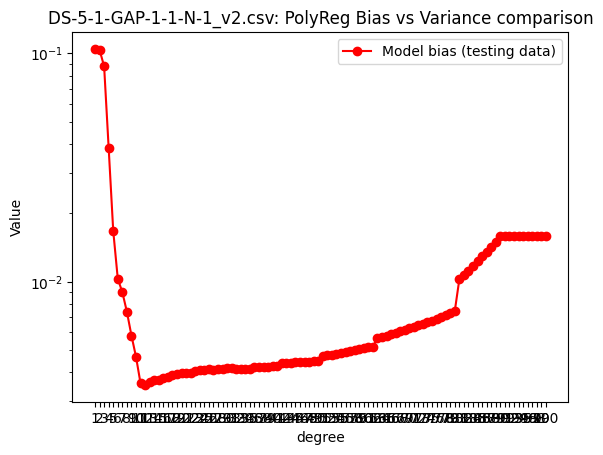

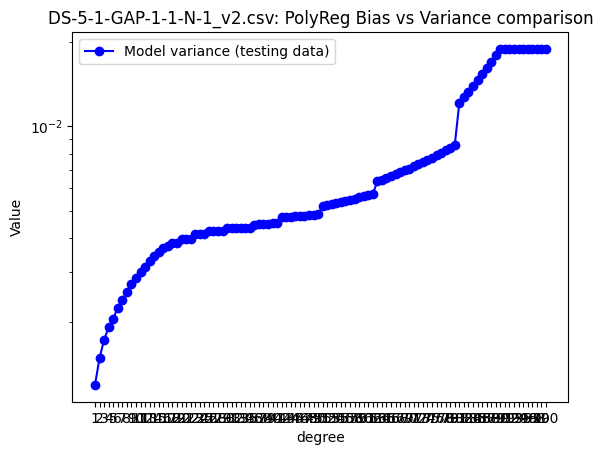

In [174]:
plt.title(f'{d_noise1.name}: PolyReg Bias vs Variance comparison')
plt.xlabel('degree')
plt.ylabel('Value')
plt.plot(mean_bias['n'], mean_bias['bias'], '-ro', label = 'Model bias (testing data)')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

print()

plt.title(f'{d_noise1.name}: PolyReg Bias vs Variance comparison')
plt.xlabel('degree')
plt.ylabel('Value')
plt.plot(mean_variance['n'], mean_variance['variance'], '-bo', label = 'Model variance (testing data)')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

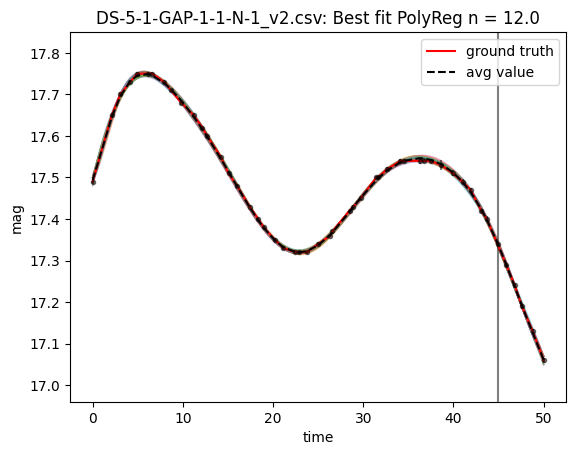

bias: 0.0035252190383768733
variance: 0.003130030770385034


In [175]:
best = mean_bias['n'][mean_bias['bias'].idxmin()]

y_pred = pd.DataFrame()

plt.title(f'{d_noise1.name}: Best fit PolyReg n = {best}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

for i in range(1, 101):

    y_train = to_column(d_noise1[i])

    coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=best)

    y_pred[i] = np.polyval(coef, x_test.squeeze())

    # plot dense graph
    x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
    y_pred_test_high_res = np.polyval(coef, x_test_high_res)
    plt.plot(x_test_high_res, y_pred_test_high_res, linewidth = 1, alpha = 0.3)

plt.errorbar(x_test.squeeze(), y_test.squeeze(), yerr = pred_variance, fmt = 'ok', alpha = 0.5, markersize = 3)

pred_mean = y_pred.mean(axis = 1)
pred_variance = y_pred.std(axis = 1)

plt.plot(x_test, y_test, 'r', label = 'ground truth')
plt.plot(x_test, pred_mean, '--k', label = 'avg value')

plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

bias = mean_bias.loc[mean_bias['n'] == best, 'bias'].values[0]
variance = mean_variance.loc[mean_variance['n'] == best, 'variance'].values[0]

print(f'bias: {bias}')
print(f'variance: {variance}')

#### Second dataset 'DS-5-1-GAP-5-1-N-3'

In [176]:
x_test = to_column(d_true[0])
y_test = to_column(d_true[1])

x_train = to_column(d_noise2[0])

A = d_noise2.iloc[:, 1:101]
A_mean = np.mean(A, axis = 1)
# A_variance = np.std(A, axis = 1) # no.

n0 = 1
nf = 100 #Number of realizations

mean_bias = pd.DataFrame({'n':[], 'bias':[]})
mean_variance = pd.DataFrame({'n':[], 'variance':[]})

for n in range(n0, nf + 1):

    y_pred = pd.DataFrame()
    y_bias = pd.DataFrame()

    for i in range(1, 101):

        y_train = to_column(d_noise2[i])

        # training
        coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=n)
        # model = np.poly1d(coef)

        # "testing"
        y_pred[i] = np.polyval(coef, x_test.squeeze())
        y_bias[i] = abs(y_pred[i] - d_true[1])

    # ignore lol
    # pred_mean = y_pred.mean(axis = 1)
    # mean_bias.loc[n-1] = [n, np.mean(abs(pred_mean - df_GAP0_N0[1]))]

    pred_mean = y_bias.mean(axis = 1)
    mean_bias.loc[n-1] = [n, np.mean(pred_mean)]

    pred_variance = y_pred.std(axis = 1)
    mean_variance.loc[n-1] = [n, np.mean(pred_variance)]

print(mean_bias)
print(mean_variance)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPy

        n          bias
0     1.0  1.043690e-01
1     2.0  1.060718e-01
2     3.0  9.187968e-02
3     4.0  5.050545e-02
4     5.0  3.643462e-02
..    ...           ...
95   96.0  2.871666e+06
96   97.0  2.870756e+06
97   98.0  2.870012e+06
98   99.0  2.871418e+06
99  100.0  2.871206e+06

[100 rows x 2 columns]
        n      variance
0     1.0  2.123902e-02
1     2.0  2.573015e-02
2     3.0  3.183630e-02
3     4.0  3.545553e-02
4     5.0  4.050162e-02
..    ...           ...
95   96.0  3.451395e+06
96   97.0  3.450296e+06
97   98.0  3.449397e+06
98   99.0  3.451099e+06
99  100.0  3.450827e+06

[100 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).su

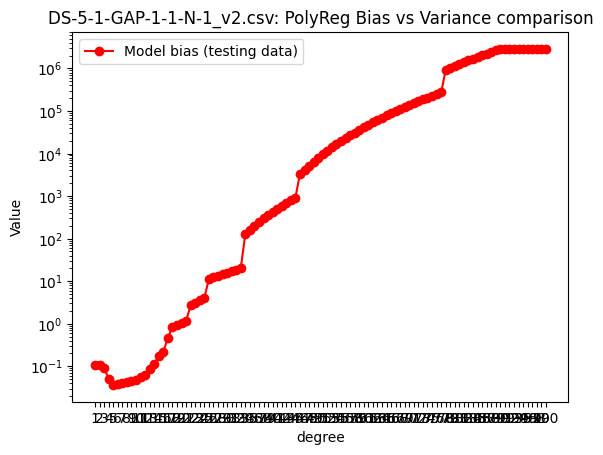

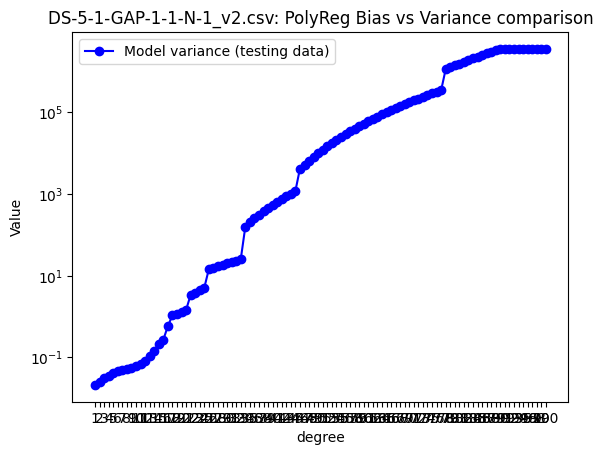

In [177]:
plt.title(f'{d_noise2.name}: PolyReg Bias vs Variance comparison')
plt.xlabel('degree')
plt.ylabel('Value')
plt.plot(mean_bias['n'], mean_bias['bias'], '-ro', label = 'Model bias (testing data)')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

print()

plt.title(f'{d_noise2.name}: PolyReg Bias vs Variance comparison')
plt.xlabel('degree')
plt.ylabel('Value')
plt.plot(mean_variance['n'], mean_variance['variance'], '-bo', label = 'Model variance (testing data)')
plt.legend(loc="best")
plt.yscale('log')
plt.xticks(range(n0, nf + 1))
plt.show()

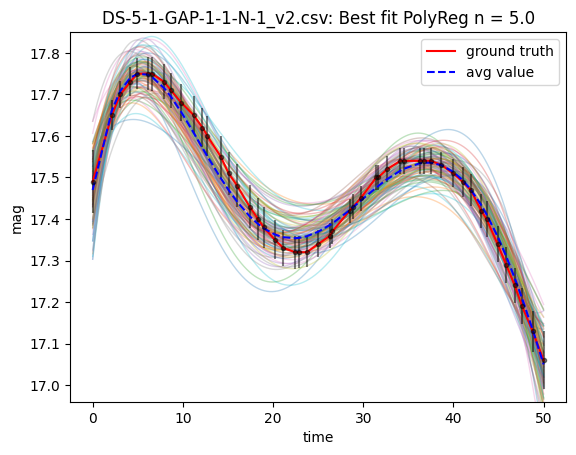

bias: 0.03643461914161803
variance: 0.040501619351670966


In [178]:
best = mean_bias['n'][mean_bias['bias'].idxmin()]

y_pred = pd.DataFrame()

plt.title(f'{d_noise2.name}: Best fit PolyReg n = {best}')
plt.ylim(y_test.min() - 0.1, y_test.max() + 0.1)

for i in range(1, 101):

    y_train = to_column(d_noise2[i])

    coef = np.polyfit(x_train.squeeze(), y_train.squeeze(), deg=best)

    y_pred[i] = np.polyval(coef, x_test.squeeze())

    # plot dense graph
    x_test_high_res = np.linspace(x_test.min(), x_test.max(), 1000)
    y_pred_test_high_res = np.polyval(coef, x_test_high_res)
    plt.plot(x_test_high_res, y_pred_test_high_res, linewidth = 1, alpha = 0.3)

pred_mean = y_pred.mean(axis = 1)
pred_variance = y_pred.std(axis = 1)

plt.errorbar(x_test.squeeze(), y_test.squeeze(), yerr = pred_variance, fmt = 'ok', alpha = 0.5, markersize = 3)

plt.plot(x_test, y_test, 'r', label = 'ground truth')
plt.plot(x_test, pred_mean, '--b', label = 'avg value')

plt.xlabel('time')
plt.ylabel('mag')
plt.legend(loc="best")
plt.show()

bias = mean_bias.loc[mean_bias['n'] == best, 'bias'].values[0]
variance = mean_variance.loc[mean_variance['n'] == best, 'variance'].values[0]

print(f'bias: {bias}')
print(f'variance: {variance}')

### Splines (cubic ones)

In [179]:
def plot_cubic_spline(x_train, y_train, x_test, y_test, cs, title):
    plt.title(title)
    plt.scatter(x_train, y_train, color='grey', label='Datos de entrenamiento')
    plt.plot(x_test, y_test, 'r', label='Verdad fundamental')
    plt.plot(x_test, cs(x_test), 'g', label='Spline cúbico')
    plt.xlabel('tiempo')
    plt.ylabel('mag')
    plt.legend(loc='best')
    plt.show()

def evaluate_cubic_spline(x_train, y_train, x_test, y_test):
    cs = CubicSpline(x_train.squeeze(), y_train.squeeze())
    plot_cubic_spline(x_train, y_train, x_test, y_test, cs, 'Interpolación de Spline Cúbico')

    # Evaluate
    y_pred_train = cs(x_train)
    y_pred_test = cs(x_test)

    # Calcule MSE
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    # Calcule Bias
    bias_train = np.mean(np.abs(y_pred_train - y_train))
    bias_test = np.mean(np.abs(y_pred_test - y_test))

    # Variance
    variance_train = np.mean(np.square(y_pred_train - np.mean(y_pred_train)))
    variance_test = np.mean(np.square(y_pred_test - np.mean(y_pred_test)))

    return mse_train, mse_test, bias_train, bias_test, variance_train, variance_test



#### First dataset 'DS-5-1-GAP-1-1-N-1'

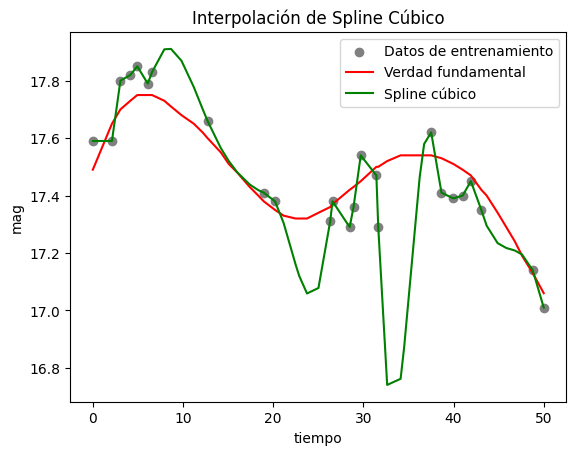

Results for First Dataset:
MSE (Training): 0.0
MSE (Testing): 0.044302461543908336
Bias (Training): 0.0
Bias (Testing): 0.12483612517924016
Variance (Training): 0.046672959999999986
Variance (Testing): 0.08050840241395131


In [180]:
# For First Dataset 'DS-5-1-GAP-1-1-N-1__v2.csv'
mse_train1, mse_test1, bias_train1, bias_test1, variance_train1, variance_test1 = evaluate_cubic_spline(
    x_train, y_train, x_test, y_test
)
# Print results for the first dataset
print("Results for First Dataset:")
print(f"MSE (Training): {mse_train1}")
print(f"MSE (Testing): {mse_test1}")
print(f"Bias (Training): {bias_train1}")
print(f"Bias (Testing): {bias_test1}")
print(f"Variance (Training): {variance_train1}")
print(f"Variance (Testing): {variance_test1}")

#### Second dataset 'DS-5-1-GAP-5-1-N-3'

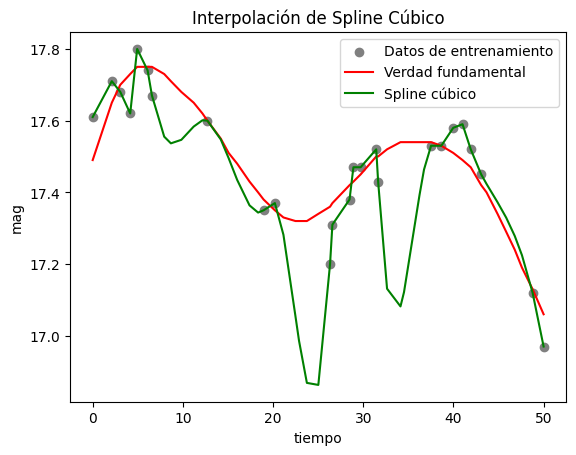


Resultados para el Segundo Conjunto de Datos:
MSE (Entrenamiento): 0.0
MSE (Pruebas): 0.027667228488156406
Bias (Entrenamiento): 0.0
Bias (Pruebas): 0.10509971099017719
Varianza (Entrenamiento): 0.03671456000000007
Varianza (Pruebas): 0.04943694364875455


In [181]:
# Para el segundo conjunto de datos 'DS-5-1-GAP-5-1-N-3__v2.csv'
x_train2 = to_column(d_noise2[0])
y_train2 = to_column(d_noise2[1])

mse_train2, mse_test2, bias_train2, bias_test2, variance_train2, variance_test2 = evaluate_cubic_spline(
    x_train2, y_train2, x_test, y_test
)

# Imprimir resultados para el segundo conjunto de datos
print("\nResultados para el Segundo Conjunto de Datos:")
print(f"MSE (Entrenamiento): {mse_train2}")
print(f"MSE (Pruebas): {mse_test2}")
print(f"Bias (Entrenamiento): {bias_train2}")
print(f"Bias (Pruebas): {bias_test2}")
print(f"Varianza (Entrenamiento): {variance_train2}")
print(f"Varianza (Pruebas): {variance_test2}")


## Conclusions



I wasn't able to successfully implement splines or Fourier regression for time-based analysis, but I'm definitely committed to researching how they can be applied to predictions and more. Measuring the error was indeed a challenge, especially since I wasn't responsible for most of the code. Interestingly, the high-degree polynomial models showcased remarkable precision when adequately configured. However, overfitting posed a significant risk, causing the models to deviate from reality and ultimately leading to unreliable predictions.

In my view, the key takeaway is the immense value of various regression techniques. They not only aid in comprehending data measurements but also equip us with the tools to identify and understand errors, paving the way for more accurate and robust models.

## References


1.   Cuevas, J. (2020). Handouts on Classification Algorithms. DOI:10.13140/RG.2.2.23597.03043/1
2.  Blondel, M., Vanderplas, J., Lorentzen, C., & Londschien, M. (s.f.). Polynomial and Spline interpolation. Recuperado de https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html?highlight=splines
3.   Orange Data Mining. (s.f.). Earth - Multivariate adaptive regression splines. Recuperado de https://orangedatamining.com/blog/earth-multivariate-adaptive-regression-splines/
4.   Barajas MArtinez Mikel Ignacio (2024). Polynomial Regression on Non-Linear Data 2: Bias & Variance
5.   Martinez Jimenez Hector Manuel (2024). Underfitting vs. Overfitting - Scikit learn example.
6.   Cuevas-Tello, Juan Carlos. (2022). Slides of Regression Algorithms: Linear, Polynomial, Splines and Fourier.








##### Notes: Much of this code was corrected by Chat-GPT






